Using machine learning based methods to identify defaults in matter during laser powder processes

In [182]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.fftpack

In [183]:
conduction = pd.read_csv("Data/File_1_conduction.csv", header = None)
keyhole = pd.read_csv("Data/File_12_lackOfFusion.csv", header = None)

In [184]:
#initialisation of clock variables
clock = 3048780.48780488
delay_in_samples = 304878
T = delay_in_samples / clock
N = conduction.shape[0]

print("the frequency of the signal is", int(1/T), "Hz")
print("the number of samples is", N) 




the frequency of the signal is 10 Hz
the number of samples is 409400


In [185]:

#create a second array containing the timestamps of my dataset: 


def prepareData(df,T):
    df['time'] = np.arange(len(df)) * T
    df.rename(columns = {0:'amplitude'}, inplace = True)
    df = df.reindex(columns = ['time', 'amplitude'])
    return df 

conduction = prepareData(conduction, T)
 

    


<AxesSubplot:xlabel='time'>

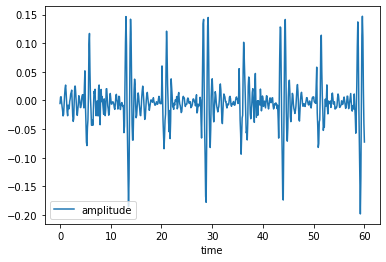

In [187]:
#small snapshot to visualize the signal (first sixty seconds)
smaller_conduction = conduction[conduction['time'] < 60]
smaller_conduction.plot(x='time', y='amplitude')   

In [188]:
#do the FFT directly in pandas
amplitudes = conduction['amplitude'].to_numpy()
fft_conduction = scipy.fftpack.fft(amplitudes)


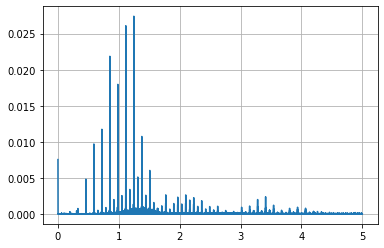

In [203]:
def showFFT(amplitudes, N, T):
    #TODO : does NOT work with the original value of T, goes from 0 to 5
    x = np.linspace(0.0, N*T, N, endpoint=False)
    y = amplitudes
    yf = scipy.fftpack.fft(amplitudes)
    xf = scipy.fftpack.fftfreq(N, T)[:N//2]
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    plt.grid()
    plt.show()

showFFT(amplitudes, N, T)

In [193]:
#Should I try linear regression?